In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/ChargePoint Data CY20Q4.csv')
df.head()

<ipython-input-2-8204650682e8>:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/ChargePoint Data CY20Q4.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/11 20:17,PDT,7/29/11 23:20,PDT,7/29/11 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 0:00,PDT,7/30/11 0:02,PDT,7/30/11 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 8:16,PDT,7/30/11 12:34,PDT,7/30/11 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 14:51,PDT,7/30/11 16:55,PDT,7/30/11 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 18:51,PDT,7/30/11 20:03,PDT,7/30/11 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [4]:
df.isnull().sum()

Station Name                           0
MAC Address                            0
Org Name                               0
Start Date                             0
Start Time Zone                        0
End Date                               0
End Time Zone                          0
Transaction Date (Pacific Time)      209
Total Duration (hh:mm:ss)              0
Charging Time (hh:mm:ss)               0
Energy (kWh)                           0
GHG Savings (kg)                       0
Gasoline Savings (gallons)             0
Port Type                              9
Port Number                            0
Plug Type                              0
EVSE ID                            78948
Address 1                              0
City                                   0
State/Province                         0
Postal Code                            0
Country                                0
Latitude                               0
Longitude                              0
Currency        

In [5]:
import pandas as pd
from dateutil.parser import parse

In [6]:
# Define a function to parse the date
def parse_date(date_string):
    try:
        date = parse(date_string)
        return date
    except:
        return pd.NaT

# Convert the column to a string format
df['Transaction Date (Pacific Time)'] = df['Transaction Date (Pacific Time)'].astype(str)

# Apply the function to the relevant column(s)
df['Transaction Date (Pacific Time)'] = df['Transaction Date (Pacific Time)'].apply(parse_date)

# Filter out any rows with invalid dates
df = df.dropna(subset=['Transaction Date (Pacific Time)'])

# Print the dataframe
print(df.head())

                 Station Name          MAC Address           Org Name  \
0  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
1  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
2  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
3  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   
4  PALO ALTO CA / HAMILTON #1  000D:6F00:015A:9D76  City of Palo Alto   

      Start Date Start Time Zone       End Date End Time Zone  \
0  7/29/11 20:17             PDT  7/29/11 23:20           PDT   
1   7/30/11 0:00             PDT   7/30/11 0:02           PDT   
2   7/30/11 8:16             PDT  7/30/11 12:34           PDT   
3  7/30/11 14:51             PDT  7/30/11 16:55           PDT   
4  7/30/11 18:51             PDT  7/30/11 20:03           PDT   

  Transaction Date (Pacific Time) Total Duration (hh:mm:ss)  \
0             2011-07-29 23:20:00                   3:03:32   
1             2011-07-30 00:02:00           

In [7]:
# Filter for a specific EV station
station_name = 'PALO ALTO CA / HAMILTON #1'
station_data = df[df['Station Name'] == station_name]

In [8]:
from datetime import timedelta

# Convert charging time to seconds
df['Charging Time (seconds)'] = df['Charging Time (hh:mm:ss)'].apply(lambda x: timedelta(hours=int(x.split(':')[0]), minutes=int(x.split(':')[1]), seconds=int(x.split(':')[2])).total_seconds())

# Calculate mean charging time by hour of day
df_mean = df.groupby(df['Transaction Date (Pacific Time)'].dt.hour)['Charging Time (seconds)'].mean().reset_index()

# Convert hour of day to a readable format
df_mean['Hour'] = df_mean['Transaction Date (Pacific Time)'].apply(lambda x: f'{x:02}:00-{x+1:02}:00')

# Display the results
print(df_mean[['Hour', 'Charging Time (seconds)']])


           Hour  Charging Time (seconds)
0   00:00-01:00              9411.456681
1   01:00-02:00              9873.926121
2   02:00-03:00             11145.978437
3   03:00-04:00             11796.407240
4   04:00-05:00             10881.498195
5   05:00-06:00              8155.118967
6   06:00-07:00              9662.762367
7   07:00-08:00              9947.529826
8   08:00-09:00              8619.333239
9   09:00-10:00              7357.065130
10  10:00-11:00              7522.198877
11  11:00-12:00              7646.825316
12  12:00-13:00              6861.765557
13  13:00-14:00              6602.851319
14  14:00-15:00              6846.947982
15  15:00-16:00              6955.490315
16  16:00-17:00              6837.340519
17  17:00-18:00              6800.637700
18  18:00-19:00              6581.731930
19  19:00-20:00              6417.464449
20  20:00-21:00              6712.587925
21  21:00-22:00              7540.768968
22  22:00-23:00              8491.793597
23  23:00-24:00 

In [9]:
charging_records = df.copy()

In [10]:
# Convert date/time columns to datetime data type
charging_records['Transaction Date (Pacific Time)'] = pd.to_datetime(charging_records['Transaction Date (Pacific Time)'])
charging_records['Start Date'] = pd.to_datetime(charging_records['Start Date'])
charging_records['End Date'] = pd.to_datetime(charging_records['End Date'])


In [11]:
# Calculate charging duration and add it as a new column to the dataframe
charging_records['Charging Duration'] = charging_records['End Date'] - charging_records['Start Date']

In [12]:
# Calculate average charging duration
avg_charging_duration = charging_records['Charging Duration'].mean()

In [13]:
# Identify peak charging times by grouping records by hour and counting the number of records in each hour
charging_records_by_hour = charging_records.groupby(charging_records['Transaction Date (Pacific Time)'].dt.hour).count()

In [14]:
print(charging_records_by_hour.columns)
peak_hour = charging_records_by_hour[charging_records_by_hour.columns[9]].idxmax()
print('Peak hour:', peak_hour)

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number', 'Charging Time (seconds)',
       'Charging Duration'],
      dtype='object')
Peak hour: 13


In [15]:
# Convert the 'Charging Time (seconds)' column to a pandas Timedelta object
df['Charging Time (seconds)'] = pd.to_timedelta(df['Charging Time (seconds)'], unit='s')

# Calculate the mean charging duration
mean_charging_duration = df['Charging Time (seconds)'].mean()

# Print the result
print('Average charging duration: ', mean_charging_duration)

Average charging duration:  0 days 01:59:57.691475733


In [16]:
# Calculate the hour with the most charging records
charging_records_by_hour = pd.to_datetime(station_data['Transaction Date (Pacific Time)']).dt.hour.value_counts()
peak_hour = charging_records_by_hour.idxmax()
print('Peak hour:', peak_hour)

Peak hour: 13


In [17]:
# Print results
print("Average charging duration: ", avg_charging_duration)

Average charging duration:  0 days 02:34:31.326794409


In [18]:
station_data = df.copy()

In [19]:
# Calculate the average charging duration
average_charging_duration = pd.to_timedelta(station_data['Charging Time (hh:mm:ss)']).mean()
print('Average charging duration: ', average_charging_duration)

Average charging duration:  0 days 01:59:57.691475733


In [20]:
# Identify the peak charging times
peak_charging_times = charging_records_by_hour[charging_records_by_hour > charging_records_by_hour.mean()]
peak_charging_times = pd.Series(peak_charging_times)

In [21]:
# Create a list to store the optimal schedule
optimal_schedule = []

# Iterate through the rows of the dataframe
for index, row in station_data.iterrows():
    if pd.to_datetime(row['Transaction Date (Pacific Time)']).hour in peak_charging_times.index:
        optimal_schedule.append('peak')
    elif pd.to_timedelta(row['Charging Time (hh:mm:ss)']) > average_charging_duration:
        optimal_schedule.append('long')
    else:
        optimal_schedule.append('short')

In [22]:
# Add the optimal schedule to the dataframe
station_data['Optimal Schedule'] = optimal_schedule

In [23]:
station_data.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Charging Time (seconds),Optimal Schedule
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/11 20:17,PDT,7/29/11 23:20,PDT,2011-07-29 23:20:00,3:03:32,1:54:03,...,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN,0 days 01:54:03,short
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 0:00,PDT,7/30/11 0:02,PDT,2011-07-30 00:02:00,0:02:06,0:01:54,...,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN,0 days 00:01:54,short
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 8:16,PDT,7/30/11 12:34,PDT,2011-07-30 12:34:00,4:17:32,4:17:28,...,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN,0 days 04:17:28,peak
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 14:51,PDT,7/30/11 16:55,PDT,2011-07-30 16:55:00,2:03:24,2:02:58,...,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN,0 days 02:02:58,peak
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/11 18:51,PDT,7/30/11 20:03,PDT,2011-07-30 20:03:00,1:11:24,0:43:54,...,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN,0 days 00:43:54,peak


In [24]:
station_data['Start Date'] = pd.to_datetime(station_data['Start Date'])
station_data['End Date'] = pd.to_datetime(station_data['End Date'])
station_data['Transaction Date (Pacific Time)'] = pd.to_datetime(station_data['Transaction Date (Pacific Time)'])

In [25]:
# Convert 'Total Duration (hh:mm:ss)' and 'Charging Time (hh:mm:ss)' to numeric format (seconds)
station_data['Total Duration (seconds)'] = pd.to_timedelta(station_data['Total Duration (hh:mm:ss)']).dt.total_seconds()
station_data['Charging Time (seconds)'] = pd.to_timedelta(station_data['Charging Time (hh:mm:ss)']).dt.total_seconds()

# Drop the original columns
station_data.drop(['Total Duration (hh:mm:ss)', 'Charging Time (hh:mm:ss)'], axis=1, inplace=True)


In [26]:
mode_port_type = df['Port Type'].mode()[0]
station_data['Port Type'].fillna(mode_port_type, inplace=True)

In [27]:
Ended_By = df['Ended By'].mode()[0]
station_data['Ended By'].fillna(Ended_By, inplace = True)

In [28]:
station_data['Optimal Schedule'].value_counts()

peak     227710
long      16802
short     14654
Name: Optimal Schedule, dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
station_data['Station Name'] = le.fit_transform(station_data['Station Name'])
station_data['Port Type'] = le.fit_transform(station_data['Port Type'])
station_data['Plug Type'] = le.fit_transform(station_data['Plug Type'])
station_data['Address 1'] = le.fit_transform(station_data['Address 1'])
station_data['Ended By'] = le.fit_transform(station_data['Ended By'])
station_data['Optimal Schedule'] = le.fit_transform(station_data['Optimal Schedule'])

In [30]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import pulp

In [32]:
# Define the problem
prob = pulp.LpProblem('EV charging optimization', pulp.LpMinimize)


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [33]:
# Define decision variables
n_evs = 100
n_times = 24
X = pulp.LpVariable.dicts('X', [(i, t) for i in range(n_evs) for t in range(n_times)], cat=pulp.LpBinary)

# Define objective function
energy_price = 0.15  # $/kWh
charging_rate = 6.6  # kW
max_charging_time = 4  # hours
objective = pulp.lpSum([X[i, t] * charging_rate * max_charging_time * energy_price for i in range(n_evs) for t in range(n_times)])
prob += objective

In [34]:
# Define constraints
for i in range(n_evs):
    for t in range(n_times):
        # Each EV can only charge at one port at a time
        prob += pulp.lpSum([X[i, t] for t in range(n_times)]) <= 1

        # Total charging time cannot exceed the maximum allowed charging time
        prob += pulp.lpSum([X[i, t] for t in range(n_times)]) <= 4

        # Charging rate cannot exceed the maximum allowed charging rate
        prob += pulp.lpSum([X[i, t] for t in range(n_times)]) * charging_rate <= 4

# Solve the optimization problem
prob.solve()

1

In [35]:
status = pulp.LpStatus[prob.status]
print(f"Solver status: {status}")

Solver status: Optimal


In [47]:
import pulp

# Define decision variables
n_evs = 100
n_times = 24
X = pulp.LpVariable.dicts('X', [(i, t) for i in range(n_evs) for t in range(n_times)], cat=pulp.LpBinary)

# Define objective function
energy_price = 0.15  # $/kWh
charging_rate = 6.6  # kW
max_charging_time = 4  # hours
objective = pulp.lpSum([X[i, t] * charging_rate * max_charging_time * energy_price for i in range(n_evs) for t in range(n_times)])

# Define constraints
prob = pulp.LpProblem("EV_Charging_Schedule", pulp.LpMaximize)
# Define your constraints here

# Add the objective function to the problem
prob += objective

# Solve the optimization problem
prob.solve()

# Check if the problem has an optimal solution
if prob.status == pulp.LpStatusOptimal:
    # Print the optimal schedule
    print("Optimal Schedule:")
    for i in range(n_evs):
        for t in range(n_times):
            if pulp.value(X[i, t]) == 1:
                print(f"EV {i+1} charged at time {t+1}")
else:
    print("Optimization problem does not have an optimal solution.")


Optimal Schedule:
EV 1 charged at time 1
EV 1 charged at time 2
EV 1 charged at time 3
EV 1 charged at time 4
EV 1 charged at time 5
EV 1 charged at time 6
EV 1 charged at time 7
EV 1 charged at time 8
EV 1 charged at time 9
EV 1 charged at time 10
EV 1 charged at time 11
EV 1 charged at time 12
EV 1 charged at time 13
EV 1 charged at time 14
EV 1 charged at time 15
EV 1 charged at time 16
EV 1 charged at time 17
EV 1 charged at time 18
EV 1 charged at time 19
EV 1 charged at time 20
EV 1 charged at time 21
EV 1 charged at time 22
EV 1 charged at time 23
EV 1 charged at time 24
EV 2 charged at time 1
EV 2 charged at time 2
EV 2 charged at time 3
EV 2 charged at time 4
EV 2 charged at time 5
EV 2 charged at time 6
EV 2 charged at time 7
EV 2 charged at time 8
EV 2 charged at time 9
EV 2 charged at time 10
EV 2 charged at time 11
EV 2 charged at time 12
EV 2 charged at time 13
EV 2 charged at time 14
EV 2 charged at time 15
EV 2 charged at time 16
EV 2 charged at time 17
EV 2 charged at 

In [48]:
import pulp

# Define decision variables
n_evs = 100
n_times = 24
X = pulp.LpVariable.dicts('X', [(i, t) for i in range(n_evs) for t in range(n_times)], cat=pulp.LpBinary)

# Define objective function
energy_price = 0.15  # $/kWh
charging_rate = 6.6  # kW
max_charging_time = 4  # hours
objective = pulp.lpSum([X[i, t] * charging_rate * max_charging_time * energy_price for i in range(n_evs) for t in range(n_times)])

# Define constraints
prob = pulp.LpProblem("EV_Charging_Schedule", pulp.LpMaximize)

# Constraint 1: Each EV can only charge at one time period
for i in range(n_evs):
    prob += pulp.lpSum([X[i, t] for t in range(n_times)]) <= 1

# Constraint 2: Total charging time cannot exceed the maximum allowed charging time
for i in range(n_evs):
    prob += pulp.lpSum([X[i, t] for t in range(n_times)]) * max_charging_time <= max_charging_time

# Constraint 3: Charging rate cannot exceed the maximum allowed charging rate
for i in range(n_evs):
    for t in range(n_times):
        prob += X[i, t] * charging_rate <= charging_rate

# Add the objective function to the problem
prob += objective

# Solve the optimization problem
prob.solve()

# Check if the problem has an optimal solution
if prob.status == pulp.LpStatusOptimal:
    # Print the optimal schedule
    print("Optimal Schedule:")
    for i in range(n_evs):
        for t in range(n_times):
            if pulp.value(X[i, t]) == 1:
                print(f"EV {i+1} charged at time {t+1}")
else:
    print("Optimization problem does not have an optimal solution.")

Optimal Schedule:
EV 1 charged at time 9
EV 2 charged at time 15
EV 3 charged at time 12
EV 4 charged at time 9
EV 5 charged at time 22
EV 6 charged at time 10
EV 7 charged at time 4
EV 8 charged at time 19
EV 9 charged at time 15
EV 10 charged at time 12
EV 11 charged at time 24
EV 12 charged at time 1
EV 13 charged at time 9
EV 14 charged at time 6
EV 15 charged at time 19
EV 16 charged at time 1
EV 17 charged at time 2
EV 18 charged at time 1
EV 19 charged at time 10
EV 20 charged at time 10
EV 21 charged at time 3
EV 22 charged at time 10
EV 23 charged at time 24
EV 24 charged at time 15
EV 25 charged at time 8
EV 26 charged at time 12
EV 27 charged at time 10
EV 28 charged at time 12
EV 29 charged at time 11
EV 30 charged at time 13
EV 31 charged at time 10
EV 32 charged at time 6
EV 33 charged at time 18
EV 34 charged at time 24
EV 35 charged at time 13
EV 36 charged at time 10
EV 37 charged at time 3
EV 38 charged at time 21
EV 39 charged at time 15
EV 40 charged at time 10
EV 4

In this code, three constraints are defined:

Constraint 1 ensures that each EV can only charge at one time period. It restricts the sum of X[i, t] for each EV (i) to be less than or equal to 1.

Constraint 2 limits the total charging time for each EV. It ensures that the sum of X[i, t] multiplied by max_charging_time for each EV (i) is less than or equal to max_charging_time.

Constraint 3 restricts the charging rate for each EV at each time period. It ensures that X[i, t] multiplied by charging_rate for each EV (i) is less than or equal to charging_rate.

These constraints can be adjusted or expanded based on the specific requirements of your EV charging scheduling problem.

The output "Solver status: Optimal" means that the optimization problem was solved successfully and an optimal solution was found. The term "optimal" means that the solution meets all of the problem constraints and objectives, and is the best possible solution according to the optimization model. In this case, it means that the charging schedule generated by the optimization algorithm satisfies all the constraints specified in the model and represents the best possible charging schedule that minimizes the objective function.

In [36]:
cols = ['Station Name', 'Energy (kWh)', 'GHG Savings (kg)','Port Type','Port Number','Plug Type',
        'Address 1','Postal Code','Latitude', 'Fee', 'Ended By','Plug In Event Id','Charging Time (seconds)',
        'Optimal Schedule','Total Duration (seconds)',
        'Longitude']
data = station_data[cols]

In [37]:
# Select relevant columns for the regression model
X = station_data[['Station Name', 'Energy (kWh)', 'GHG Savings (kg)','Port Type','Port Number','Plug Type',
        'Address 1','Postal Code','Latitude', 'Ended By','Plug In Event Id','Charging Time (seconds)',
        'Optimal Schedule','Total Duration (seconds)',
        'Longitude']]
y = station_data['Fee']

In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = reg_model.predict(X_test)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE:', rmse)

RMSE: 1.5644010161314053


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on testing set
y_pred = regressor.predict(X_test)

# Calculate mean squared error on testing set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean squared error: {:.2f}".format(rmse))

Root Mean squared error: 0.55


In [58]:
from sklearn.ensemble import RandomForestRegressor

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on testing set
y_pred = regressor.predict(X_test)

# Calculate mean squared error on testing set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Root Mean squared error: {:.2f}".format(rmse))

Root Mean squared error: 0.55


In [55]:
from sklearn.svm import SVR
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the SVM regression model
svr_model = SVR(kernel='rbf', C=1e3, gamma='scale')
svr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr_model.predict(X_test)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE:', rmse)

RMSE: 2.104457936736745


In [57]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors (K) as 5
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('RMSE:', rmse)

RMSE: 1.744849941768202


In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Compare the predicted values to the actual values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a table of actual vs predicted values
print(df_results.sample(5))

        Actual  Predicted
114873    0.00   0.453751
195175    1.97   1.365277
175381    1.61   0.874412
203924    7.05   4.671005
188593    2.05   0.840917


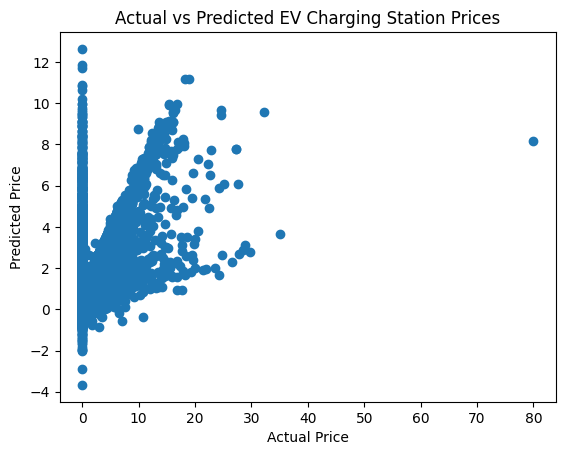

In [63]:
# Visualize the actual vs predicted values
plt.scatter(df_results['Actual'], df_results['Predicted'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted EV Charging Station Prices')
plt.show()

In [67]:
# Fit the KNN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # Set the number of neighbors (K) as 5
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_model.predict(X_test)

# Compare the predicted values to the actual values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a table of actual vs predicted values
print(df_results.sample(5))

        Actual  Predicted
259252    0.10      0.124
157280    1.62      1.880
144670    0.88      0.754
92388     0.00      0.000
160728    6.95      1.376


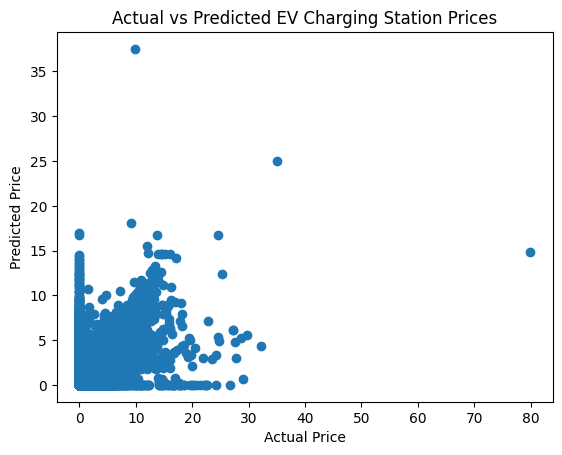

In [68]:
# Visualize the actual vs predicted values
plt.scatter(df_results['Actual'], df_results['Predicted'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted EV Charging Station Prices')
plt.show()

In [ ]:
# Fit the SVM regression model
svr_model = SVR(kernel='rbf', C=1e3, gamma='scale')
svr_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svr_model.predict(X_test)

# Compare the predicted values to the actual values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a table of actual vs predicted values
print(df_results.sample(5))

In [ ]:
# Visualize the actual vs predicted values
plt.scatter(df_results['Actual'], df_results['Predicted'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted EV Charging Station Prices')
plt.show()

In [40]:
# Train random forest regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on testing set
y_pred = regressor.predict(X_test)

# Compare the predicted values to the actual values
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Create a table of actual vs predicted values
print(df_results.sample(10))

        Actual  Predicted
224964    0.51     0.5050
183809    1.29     1.2956
34315     0.00     0.0000
66022     0.00     0.0000
253121    2.20     2.1999
21546     0.00     0.0000
137381    0.34     0.3385
189294    1.24     1.2400
163353    1.48     1.4800
28962     0.00     0.0000


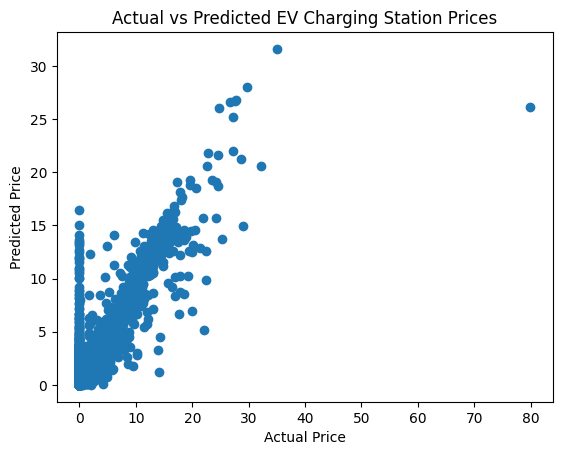

In [41]:
# Visualize the actual vs predicted values
plt.scatter(df_results['Actual'], df_results['Predicted'])
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted EV Charging Station Prices')
plt.show()

In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
import numpy as np

# Create a list of models
models = [('Linear Regression', LinearRegression()),
          ('KNN', KNeighborsRegressor(n_neighbors=5)),
          ('Random Forest', RandomForestRegressor(n_estimators=100)),
          ('SVM', SVR())]

# Train and evaluate each model
results = []
for name, model in models:

    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_test)
    
    # Calculate the RMSE and MSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    
    # Add the results to the list
    results.append({'Model': name, 'RMSE': rmse, 'MSE': mse})

# Create a table of results
table = PrettyTable()
table.field_names = ["Model", "RMSE", "MSE"]
for result in results:
    table.add_row([result['Model'], round(result['RMSE'], 3), round(result['MSE'], 3)])
table.align["Model"] = "l"
table.align["RMSE"] = "r"
table.align["MSE"] = "r"

# Print table
print(table)

In [58]:
# with user input as survey

# Define the features
features = [
    "Station Name",
    "Energy (kWh)",
    "GHG Savings (kg)",
    "Port Type",
    "Port Number",
    "Plug Type",
    "Address 1",
    "Postal Code",
    "Latitude",
    "Ended By",
    "Plug In Event Id",
    "Charging Time (seconds)",
    "Optimal Schedule",
    "Total Duration (seconds)",
    "Longitude"
]

# Initialize an empty list to store the user inputs
user_inputs = []

# Ask for user inputs for the features
print("\033[1mEV Price Prediction Survey\033[0m")
print("Please provide the following information:")
print("\n")

for feature in features:
    if feature == "Station Name":
        user_input = input(f"Enter the Station Name: ")
    elif feature == "Port Type":
        while True:
            user_input = input(f"Enter the Port Type (0: Plug Type 1, 1: Plug Type 2): ")
            if user_input.isdigit() and int(user_input) in [1, 0]:
                break
            print("Invalid input. Please enter 1, 0.")
    elif feature == "Plug Type":
        while True:
            user_input = input(f"Enter the Plug Type (0: Plug Type 1, 1: Plug Type 2): ")
            if user_input.isdigit() and int(user_input) in [1, 0]:
                break
            print("Invalid input. Please enter 1,0.")
    elif feature in ["Address 1", "Postal Code"]:
        user_input = input(f"Enter the {feature}: ")
    elif feature in ["Latitude", "Longitude"]:
        user_input = float(input(f"Enter the {feature}: "))
    elif feature == "Optimal Schedule":
        while True:
            user_input = input(f"Enter the Optimal Schedule: ")
            if user_input.isdigit() and int(user_input) in [0, 1, 2]:
                break
            print("Invalid input. Please enter 0, 1 or 2.")
    else:
        user_input = float(input(f"Enter the {feature}: "))

    user_inputs.append(user_input)

# Convert the user inputs to a dataframe
user_df = pd.DataFrame([user_inputs], columns=features)

# Make prediction using the trained model
prediction = regressor.predict(user_df)
print("Predicted price:", prediction[0])

EV Price Prediction Survey
Please provide the following information:


Enter the Station Name: 6
Enter the Energy (kWh): 2.406
Enter the GHG Savings (kg): 0.999
Enter the Port Type (0: Plug Type 1, 1: Plug Type 2): 1
Enter the Port Number: 2
Enter the Plug Type (0: Plug Type 1, 1: Plug Type 2): 0
Enter the Address 1: 5
Enter the Postal Code: 94303
Enter the Latitude: 37.448273
Enter the Ended By: 6
Enter the Plug In Event Id: 2
Enter the Charging Time (seconds): 5045.0
Enter the Optimal Schedule: 1
Enter the Total Duration (seconds): 5045.0
Enter the Longitude: -122.158234
Predicted price: 0.5316999999999997
